In [1]:
%load_ext autoreload
%autoreload 2

# Testing of simple lane app

In [2]:
import logging
logging.basicConfig()
format_ = '%(asctime) - %(message)s'
logger = logging.getLogger('test')
logger.setLevel(logging.DEBUG)

In [3]:
import matplotlib.pyplot as plt
from simple_detector import *

In [4]:
import glob
test_pack = glob.glob('test_images/*')
images = len(test_pack)
print('{0} images to plot'.format(images))

6 images to plot


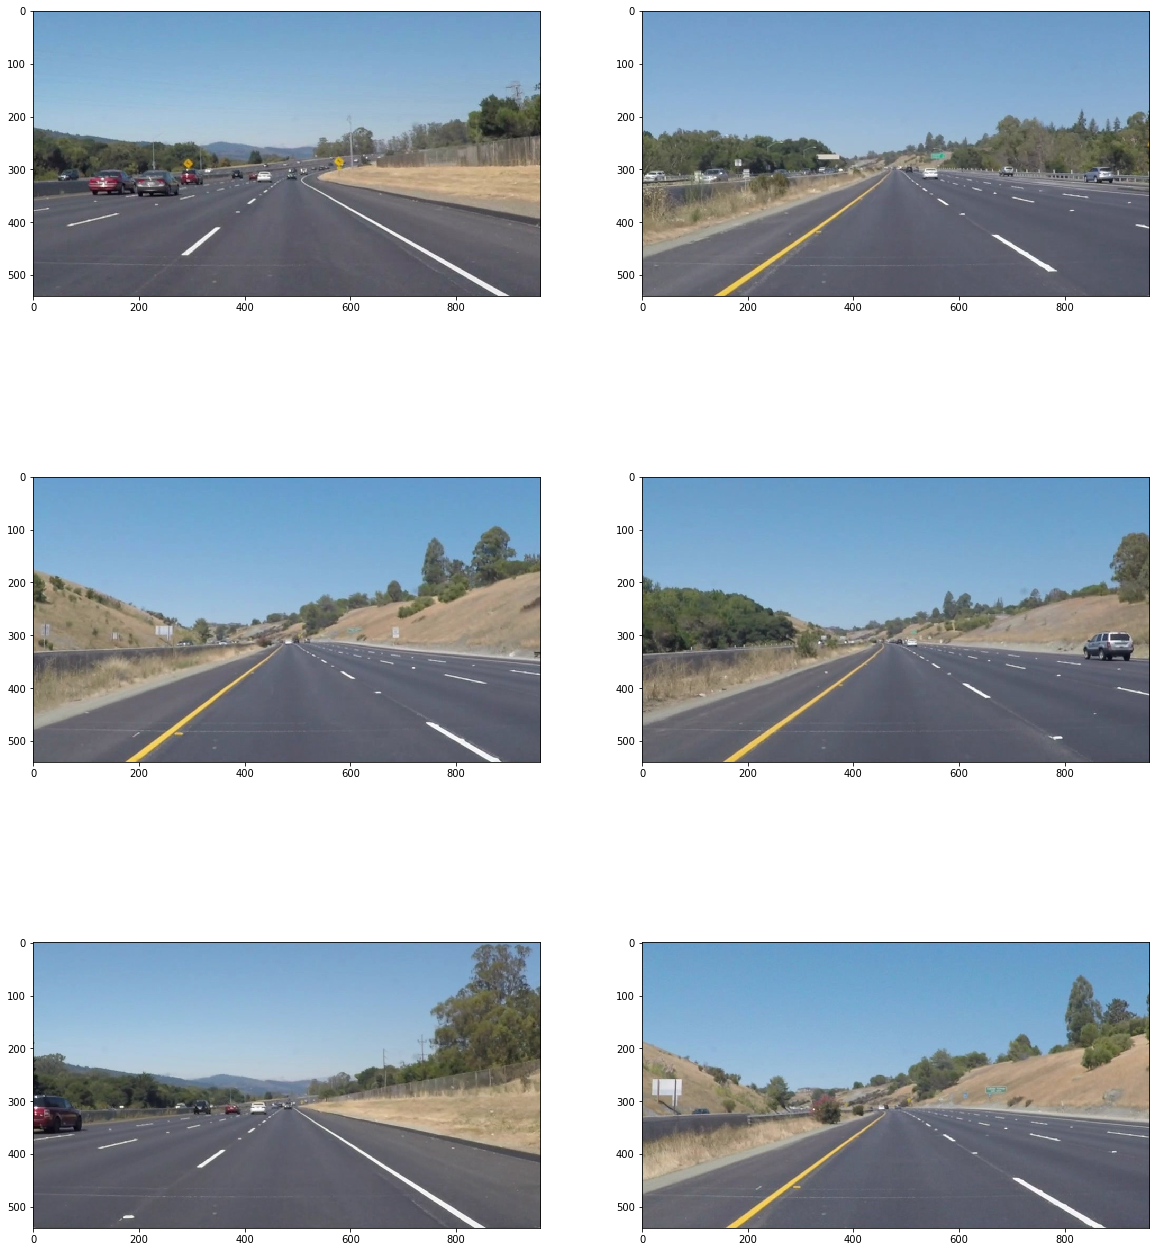

In [5]:
#fig, axarr = plt.subplots(1, images)
w, h = 40, 30
plt.figure(figsize=(20,50))
for i in range(0, images):
    #result, size = next(read_video(test_pack[i]))
    #result, size = next(read_video(test_pack[i]))
    result, size = read_video(test_pack[i])
    #gray = next(grayscale(result))
    plt.subplot(images,2,i+1)
    plt.imshow(result, interpolation='none')

# Build pipeline

In [9]:
def draw_pipeline(path: str) -> np.ndarray:
    frame, fr_shape = read_video(path)
    proc_f = grayscale(frame)
    proc_f = gaussian_blur(proc_f, 5)
    proc_f = canny(proc_f, 25, 150)
    roi = region_of_interest(proc_f, np.array([[(0.1*fr_shape[1],fr_shape[0]),
                          (fr_shape[1]*0.95, fr_shape[0]), 
                          (0.55*fr_shape[1], 0.6*fr_shape[0]), 
                          (0.45*fr_shape[1],0.6*fr_shape[0])]], dtype=np.int32))
    proc_f_lines = hough_lines(roi, 2, np.pi/180, 16, 5, 50)
    final_lines = find_lines(proc_f, proc_f_lines)
    output_img = draw_lines(proc_f, final_lines)
    output_img = weighted_img(output_img, frame)
    #logger.debug('outputting: {0}'.format(type(frame)))
    
    #yield output_img
    return output_img

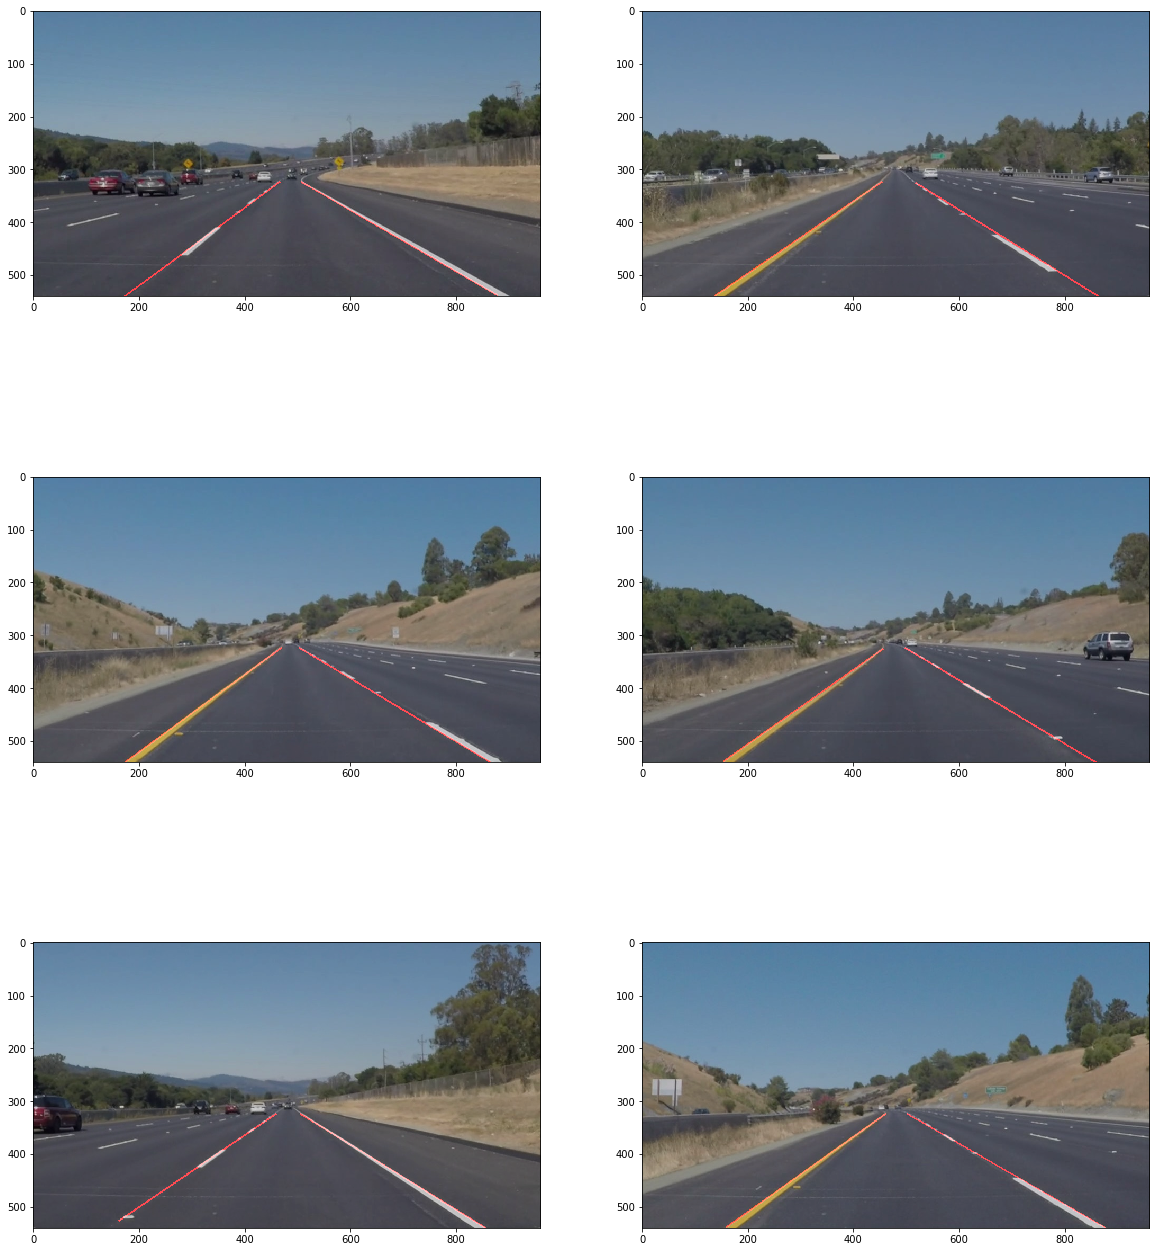

In [10]:
plt.figure(figsize=(20,50))
#logger.info('{0} images to plot'.format(images))
for i in range(0, images):
    #logger.info(print(test_pack[i]))
    result = draw_pipeline(test_pack[i])    
    
    plt.subplot(images,2,i+1)
    plt.imshow(result, cmap='gray', interpolation='none')